# CHEN 5595 Homework 6

This HW focuses on <>. It consists of both hand-written and coding exercises. I provide several definitions and hints throughout that will help you.  If you are confused about anything, do not panic, send us a message on Piazza! We are here to help you learn.

Please answer all the questions involving proofs/demonstrations using pen and paper, and all the numerical exercises using an ipython notebook **in [Google Colab](https://colab.research.google.com/)** (provide the link with your handwritten homework). **Please answer each coding problem  in a different cell**.

You can also view this ipython notebook in your browser through [binder]() or through nbviewer [link]().

## More probability distributions

### Problem 1

The _Student's t-distribution_ is obtained by adding up an infinite number of Gaussian distributions having the same mean but different precisions, weighted according to a Gamma distribution

$$\begin{aligned}
\mathrm{St}(x|\mu, a, b) &= \int_0^\infty \mathcal{N}(x|\mu, \tau^{-1}) \mathrm{Gam}(\tau|a, b) \mathrm{d}\tau \\
&= \frac{\Gamma(a+1/2)}{\Gamma(a)}\left(\frac{1}{2\pi}\right)^{1/2}b^a \left[ b + \frac{(x-\mu)^2}{2} \right ]^{-a-1/2}
\end{aligned} \label{eq:tdist} \tag{1}$$

where

$$\mathcal{N}(x|\mu, \sigma^2) = (2\pi\sigma^2)^{-1/2}\exp{\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right)}$$
$$\mathrm{Gam}(x|a, b) = \frac{1}{\Gamma(a)} b^a x^{a-1} e^{-bx}$$

are the Gaussian and Gamma distributions, respectively. 

**Q1.** Show that by expressing $\mathrm{St}(x|\mu, a, b)$ in terms of the parameters $\nu=2a$ and $\lambda=a/b$, one recovers the Student's t-distribution in the canonical form

$$\mathrm{St}(x|\mu, \nu, \lambda) = \frac{\Gamma(\nu/2+1/2)}{\Gamma(\nu/2)}\left(\frac{\lambda}{\pi\nu}\right)^{1/2} \left[ 1 + \frac{\lambda(x-\mu)^2}{\nu} \right ]^{-\nu/2-1/2}$$.

**Q2.** Also show that by making the change of variable $\tau = \lambda \eta$, the integral in Eq. \eqref{eq:tdist} can also be rewritten in terms of $\mu$, $\nu$ and $\lambda$ as

$$\mathrm{St}(x|\mu, \lambda, \nu) = \int_0^\infty \mathcal{N}(x|\mu, (\lambda\eta)^{-1}) \mathrm{Gam}(\tau|\nu/2, \nu/2) \mathrm{d}\eta$$

_Hint: the question does not ask you to compute the integrals, just to show that the integrands match under the change of variables._

**Q3.** Finally, ignoring the normalization constants we can write

$$\begin{aligned}
\mathrm{St}(x|\mu, \nu, \lambda) &\propto \left[ 1 + \frac{\lambda(x-\mu)^2}{\nu} \right ]^{-(\nu+1)/2}\\
&= \exp{\left ( -\frac{\nu-1}{2}\log \left[ 1 + \frac{\lambda(x-\mu)^2}{\nu} \right]\right)}
\end{aligned}$$

Show that in the limit $\nu \to \infty$ the t-distribution becomes of Gaussian form. _Hint: use the Taylor expansion for the logarithm:_ $\log(1+\epsilon) = \epsilon + O(\epsilon^2)$ _when_ $\epsilon \to 0$.

**Q4** Implement the t-distribution and using a plotting library of your choosing (e.g. matplotlib) plot $\mathrm{St}(x|\mu=0, \lambda=1, \nu)$ for $\nu=\{0.1, 1, 10, \infty\}$. What is the t-distribution equivalent to when $\nu=1$? Are the first and second moments of the t-distribution defined for $\nu=1$? If not, explain why.

### Problem 2

Import the 1D data from the file `hw6_data.txt` fit the data using

1. A students-t distribution using the [`scipy.stats.t`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t) class. _Hint: the `.fit()` function returns the arguments_ $\nu, \mu, \lambda$ _in the same order in which they need to be passed to the `.pdf()` function._

2. A normal distribution using the [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) class.

3. A normal distribution using the [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) class, but instead of obtaining $\mu$ and $\sigma^2$ using the built in `.fit()` function, use the robust covariance estimator [`sklearn.covariance.MinCovDet`](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.MinCovDet.html#sklearn.covariance.MinCovDet.correct_covariance) that will return a robust estimate of the mean and the variance. _Hint: see the example in the sklearn documentation linked above._

**Q1.** Using a plotting library of your choosing (e.g. matplotlib) plot a histogram of the data (make sure it is normalized), then in the same graph plot all 3 fits and comment on the results. Should you use a Gaussian distribution to fit raw data that do not look Gaussian? The Minimum Covariance Determinant (MCD) method excludes outliers that are not consisten with a Gaussian distribution, what would you say the effect of MCD is in Bayesian terms?

**Q2.** Finally describe the approach required to perform a full Bayesian inference of the parameters of a Gaussian $\mathcal{N}(x|\mu, \sigma)$, under 3 different scenarios:

1. The true variance $\sigma^2$ is know, but not the mean $\mu$ that we want to infer. Place a prior on the mean $\mu$.

2. The true mean $\mu$ is known, but not the variance $\sigma^2$ that we want to infer. Place a prior on the variance $\sigma^2$.

3. Neither the mean $\mu$ nor the variance $\sigma^2$  are know, and we want to infer them both. Place priors on both the mean and the variance $\sigma^2$.

You do not need to implement the approach in Python (though you can if you feel up to it!), just provide a discussion of the various priors and posteriors, and how you would go about performing this analysis. _Hint: go over the lecture notes from week 6_.

### Problem 3

Import the data from `hw6_data_deg.txt` containing 1000 observation of a periodic random variable $\theta$ in degrees.

**Q1.** Express the data in radians and plot a histogram of the observations using units of $2 \pi$ for the x-axis. Is this a unimodal distribution? Why?

**Q2.** Compute the mean of this distribution and verify that it is consistent with the histogram. _Hint: go over the lecture notes from week 6_.

140.9226843185688
0.7758103354310225 0.7853981633974483


(0.0, 1.0)

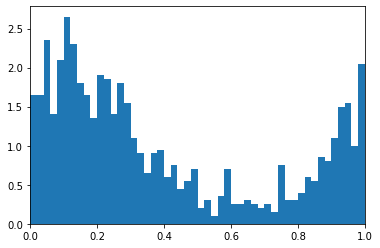

In [122]:
# X = np.random.vonmises(np.pi/4, 1, 1000)
# X = np.array([2*np.pi+x if x<0 else x for x in X])
# print((X*180/np.pi).astype('int'))
# np.savetxt('hw6_data_deg.txt', X*180/np.pi)
X = np.loadtxt('hw6_data_deg.txt')
print(np.mean(X))
X *= np.pi/180
theta = np.arctan2(np.mean(np.sin(X)), np.mean(np.cos(X)))
print(theta, np.pi/4)
plt.hist(X/ (2*np.pi), bins=50, density=1., label="samples")
plt.xlim(xmin=0, xmax=1)
# plt.hist(Y/ (2*np.pi), bins=50, density=1., label="samples")

(array([0.28109743, 0.28109743, 0.46849571, 0.46849571, 0.09369914,
        0.09369914, 0.09369914, 0.09369914, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09369914, 0.09369914, 0.        , 0.        , 0.09369914]),
 array([-1.75209636, -1.28807652, -0.82405667, -0.36003683,  0.10398301,
         0.56800285,  1.03202269,  1.49604253,  1.96006237,  2.42408221,
         2.88810205,  3.35212189,  3.81614173,  4.28016157,  4.74418142,
         5.20820126,  5.6722211 ,  6.13624094,  6.60026078,  7.06428062,
         7.52830046,  7.99

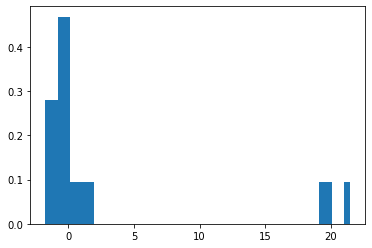

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# X = np.random.normal(size=20)
# X = np.concatenate([X, np.random.normal(loc=20., size=3)])
# np.savetxt('hw6_data.txt', X)
X=np.loadtxt('hw6_data.txt')
plt.hist(X.ravel(), bins=50, density=1., label="samples")

0.8134923833096075 -0.5561663380564394 0.5811466284836526
2.295734371001271 6.963843254447979
-0.38008760199918484 0.7408741219969581


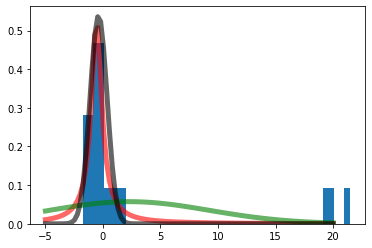

In [62]:
import scipy.stats as stats
from sklearn.covariance import MinCovDet
df, loc, scale = stats.t.fit(X)
print(df, loc, scale)
x = np.linspace(-5, 20, 100)
plt.hist(X.ravel(), bins=50, density=1., label="samples")
plt.plot(x, stats.t.pdf(x, df, loc, scale), 'r-', lw=5, alpha=0.6, label='t pdf')
loc, scale = stats.norm.fit(X)
print(loc, scale)
plt.plot(x, stats.norm.pdf(x, loc, scale), 'g-', lw=5, alpha=0.6, label='norm pdf')
mcov = MinCovDet(random_state=0).fit(X.reshape(-1, 1))
loc, scale = mcov.location_[0], mcov.covariance_[0, 0]
print(loc, scale)
plt.plot(x, stats.norm.pdf(x, loc, scale), 'k', lw=5, alpha=0.6, label='norm pdf')

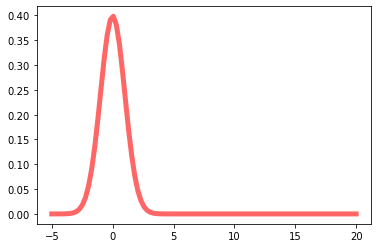

In [69]:
plt.plot(x, stats.t.pdf(x, 10000000, 0, 1), 'r-', lw=5, alpha=0.6, label='t pdf')